# Part 1
## Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple
import warnings as wrn
from scipy.stats.mstats import winsorize
import wrds

## Getting Data

In [2]:
df = pd.read_pickle('final_task_bad_data.pickle')

## Viewing data

In [97]:
df.shape

(502, 5)

In [98]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [99]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [100]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-02-17 00:00:00-05:00,154.187493,154.855315,152.114248,152.453140,8110300.0
2022-02-18 00:00:00-05:00,152.413269,153.180757,149.562559,150.868301,10785500.0
2022-02-22 00:00:00-05:00,149.702101,150.300143,147.130481,147.608917,12227200.0
2022-02-23 00:00:00-05:00,149.014346,149.253572,145.027340,145.396133,9300700.0
2022-02-24 00:00:00-05:00,139.545215,149.084134,139.545215,148.914673,12475500.0


In [101]:
df.describe()

,Open,High,Low,Close,Volume
count,502.000000,502.000000,502.000000,502.000000,5.010000e+02
mean,99.826219,101.003504,98.613673,138.813084,1.290093e+07
std,15.033235,15.250139,14.678095,624.452058,7.460270e+06
min,78.843041,79.530799,78.474245,-20.000000,5.426100e+06
25%,90.092497,90.995822,89.343816,90.181091,8.900900e+06
50%,96.002118,97.361360,94.801034,95.757915,1.125760e+07
75%,106.378302,107.644175,104.501919,106.261181,1.420600e+07
max,154.187493,154.855315,152.114248,9999.000000,7.027350e+07


### Handling Outliers

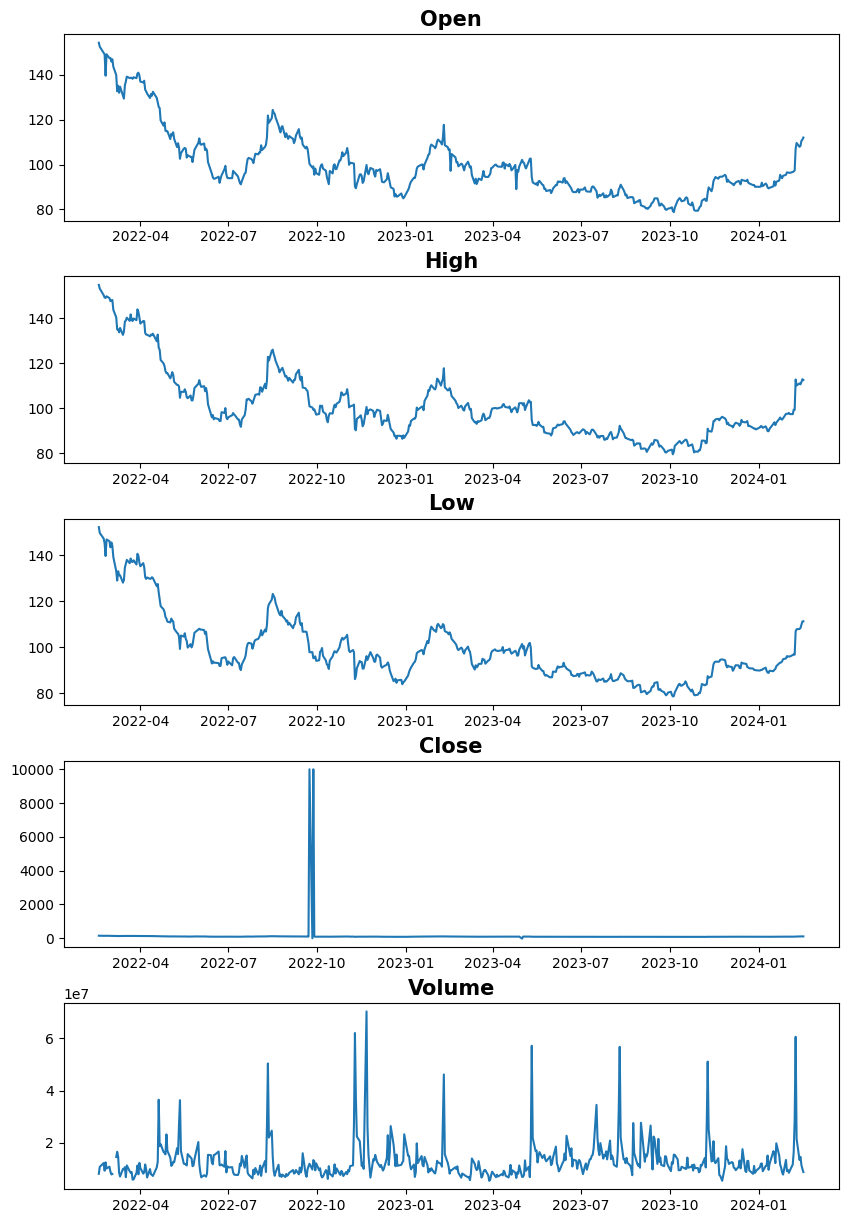

In [102]:
fig, ax = plt.subplots(nrows = 5, figsize = (10, 15))
plt.subplots_adjust(hspace = 0.3)
for i in range(df.shape[1]):
    ax[i].set_title(df.columns[i], fontweight = 'bold').set_fontsize(15)
    ax[i].plot(df[df.columns[i]])

plt.show()

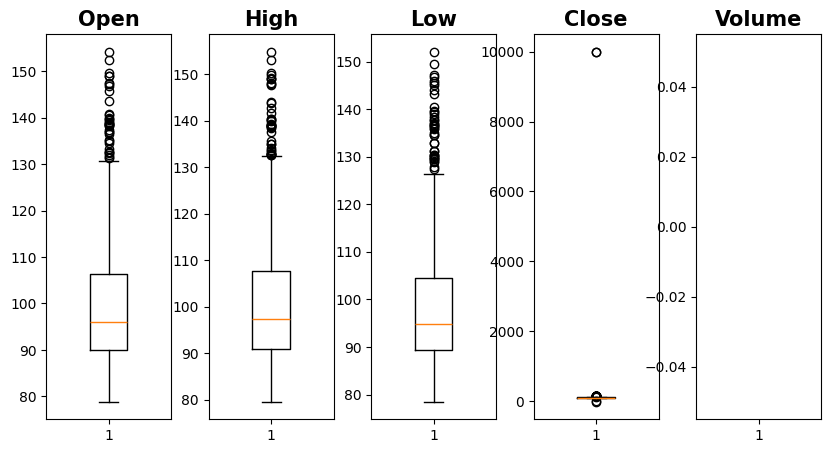

In [103]:
fig, ax = plt.subplots(ncols = 5, figsize = (10, 5))
plt.subplots_adjust(wspace = 0.3)

for i in range(df.shape[1]):
    ax[i].boxplot(df[df.columns[i]], widths = 0.3)
    ax[i].set_title(df.columns[i], fontweight = 'bold').set_fontsize(15)

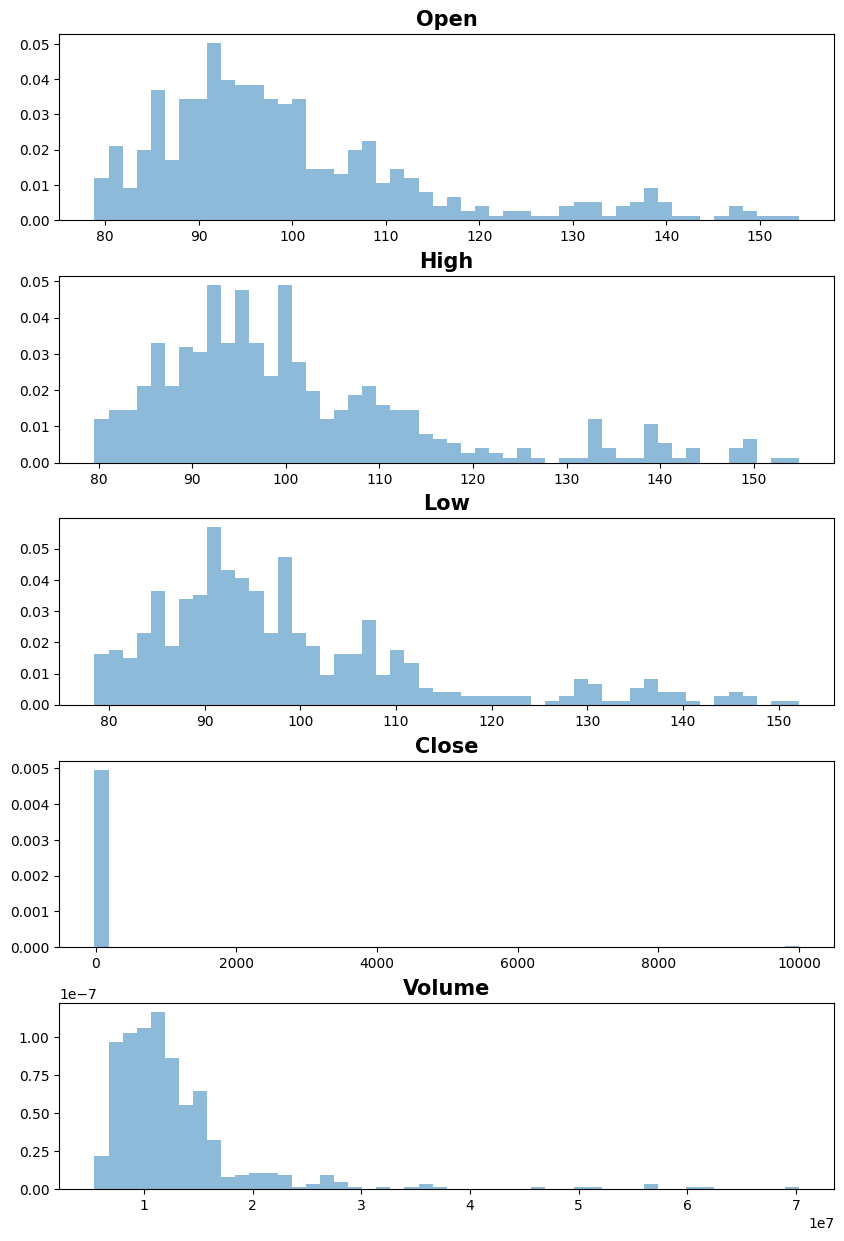

In [104]:
fig, ax = plt.subplots(nrows = 5, figsize = (10, 15))
plt.subplots_adjust(hspace = 0.3)

for i in range(df.shape[1]):
    ax[i].hist(df[df.columns[i]], bins = 50, density = True, alpha = 0.5)
    ax[i].set_title(df.columns[i], fontweight = 'bold').set_fontsize(15)

In [105]:
# Tukey's rule
# customizable version to determin how forgiving or strict we want to be apon the data
def calc_outliers_customizable(srs, lowBoundPrcnt = 0.25, highBoundPrcnt = 0.75, BoundDistCoef = 1.5):
    q1 = srs.quantile(lowBoundPrcnt)
    q3 = srs.quantile(highBoundPrcnt)
    iqr = q3 - q1
    lower_bound = q1 - BoundDistCoef * iqr
    upper_bound = q3 + BoundDistCoef * iqr
    is_outliers = (srs < lower_bound) | (srs > upper_bound)
    outliers = srs[is_outliers]
    return outliers, is_outliers

In [106]:
outliersOpen, is_outliersOpen = calc_outliers_customizable(df['Open'])
print(f'Amount of outliers in Open column: {outliersOpen.count()}')
outliersHigh, is_outliersHigh = calc_outliers_customizable(df['High'])
print(f'Amount of outliers in High column: {outliersHigh.count()}')
outliersLow, is_outliersLow = calc_outliers_customizable(df['Low'])
print(f'Amount of outliers in Low column: {outliersLow.count()}')
outliersClose, is_outliersClose = calc_outliers_customizable(df['Close'])
print(f'Amount of outliers in Close column: {outliersClose.count()}')
outliersVolume, is_outliersVolume = calc_outliers_customizable(df['Volume'])
print(f'Amount of outliers in Volume column: {outliersVolume.count()}')
print()

is_outliersOverall = sum([is_outliersOpen, is_outliersHigh, is_outliersLow, is_outliersClose, is_outliersVolume])

for i in range(df.shape[1]):
    print(f'Amount of rows with at least {i + 1} outliers: {(is_outliersOverall > i).sum()}')

Amount of outliers in Open column: 36
Amount of outliers in High column: 39
Amount of outliers in Low column: 41
Amount of outliers in Close column: 42
Amount of outliers in Volume column: 32

Amount of rows with at least 1 outliers: 77
Amount of rows with at least 2 outliers: 40
Amount of rows with at least 3 outliers: 38
Amount of rows with at least 4 outliers: 35
Amount of rows with at least 5 outliers: 0


In [107]:
print(f'Outliers of Open column: {outliersOpen}')

Outliers of Open column: Date
2022-02-17 00:00:00-05:00    154.187493
2022-02-18 00:00:00-05:00    152.413269
2022-02-22 00:00:00-05:00    149.702101
2022-02-23 00:00:00-05:00    149.014346
2022-02-24 00:00:00-05:00    139.545215
2022-02-25 00:00:00-05:00    149.074152
2022-02-28 00:00:00-05:00    147.349779
2022-03-01 00:00:00-05:00    147.379671
2022-03-02 00:00:00-05:00    145.834706
2022-03-03 00:00:00-05:00    146.831460
2022-03-04 00:00:00-05:00    143.542169
2022-03-07 00:00:00-05:00    139.824304
2022-03-08 00:00:00-05:00    132.587885
2022-03-09 00:00:00-05:00    135.049870
2022-03-10 00:00:00-05:00    131.930031
2022-03-11 00:00:00-05:00    134.641190
2022-03-16 00:00:00-04:00    135.209337
2022-03-17 00:00:00-04:00    136.993533
2022-03-18 00:00:00-04:00    139.096675
2022-03-21 00:00:00-04:00    138.448782
2022-03-22 00:00:00-04:00    138.608254
2022-03-23 00:00:00-04:00    138.618234
2022-03-24 00:00:00-04:00    138.129820
2022-03-25 00:00:00-04:00    138.827548
2022-03-28

In [108]:
print(f'Outliers of High column: {outliersHigh}')

Outliers of High column: Date
2022-02-17 00:00:00-05:00    154.855315
2022-02-18 00:00:00-05:00    153.180757
2022-02-22 00:00:00-05:00    150.300143
2022-02-23 00:00:00-05:00    149.253572
2022-02-24 00:00:00-05:00    149.084134
2022-02-25 00:00:00-05:00    149.791814
2022-02-28 00:00:00-05:00    148.994413
2022-03-01 00:00:00-05:00    147.668723
2022-03-02 00:00:00-05:00    147.987693
2022-03-03 00:00:00-05:00    148.167103
2022-03-04 00:00:00-05:00    143.791357
2022-03-07 00:00:00-05:00    140.432323
2022-03-08 00:00:00-05:00    135.049862
2022-03-09 00:00:00-05:00    135.059832
2022-03-10 00:00:00-05:00    133.764050
2022-03-11 00:00:00-05:00    135.717684
2022-03-14 00:00:00-04:00    132.637724
2022-03-15 00:00:00-04:00    134.122885
2022-03-16 00:00:00-04:00    138.528521
2022-03-17 00:00:00-04:00    139.016937
2022-03-18 00:00:00-04:00    140.272834
2022-03-21 00:00:00-04:00    138.847492
2022-03-22 00:00:00-04:00    141.728091
2022-03-23 00:00:00-04:00    139.305979
2022-03-24

In [109]:
print(f'Outliers of Low column: {outliersLow}')

Outliers of Low column: Date
2022-02-17 00:00:00-05:00    152.114248
2022-02-18 00:00:00-05:00    149.562559
2022-02-22 00:00:00-05:00    147.130481
2022-02-23 00:00:00-05:00    145.027340
2022-02-24 00:00:00-05:00    139.545215
2022-02-25 00:00:00-05:00    146.741757
2022-02-28 00:00:00-05:00    145.984234
2022-03-01 00:00:00-05:00    143.312924
2022-03-02 00:00:00-05:00    145.445973
2022-03-03 00:00:00-05:00    143.980750
2022-03-04 00:00:00-05:00    139.096666
2022-03-07 00:00:00-05:00    133.006527
2022-03-08 00:00:00-05:00    128.869991
2022-03-09 00:00:00-05:00    132.926784
2022-03-10 00:00:00-05:00    131.192429
2022-03-11 00:00:00-05:00    131.142598
2022-03-14 00:00:00-04:00    127.962957
2022-03-15 00:00:00-04:00    129.089286
2022-03-16 00:00:00-04:00    134.501652
2022-03-17 00:00:00-04:00    136.116387
2022-03-18 00:00:00-04:00    137.850735
2022-03-21 00:00:00-04:00    136.435355
2022-03-22 00:00:00-04:00    138.448770
2022-03-23 00:00:00-04:00    137.093190
2022-03-24 

In [110]:
print(f'Outliers of Close column: {outliersClose}')

Outliers of Close column: Date
2022-02-17 00:00:00-05:00     152.453140
2022-02-18 00:00:00-05:00     150.868301
2022-02-22 00:00:00-05:00     147.608917
2022-02-23 00:00:00-05:00     145.396133
2022-02-24 00:00:00-05:00     148.914673
2022-02-25 00:00:00-05:00     149.044250
2022-02-28 00:00:00-05:00     147.977737
2022-03-01 00:00:00-05:00     145.226685
2022-03-02 00:00:00-05:00     146.861359
2022-03-03 00:00:00-05:00     145.097122
2022-03-04 00:00:00-05:00     140.262863
2022-03-07 00:00:00-05:00     133.066330
2022-03-08 00:00:00-05:00     131.322006
2022-03-09 00:00:00-05:00     133.215836
2022-03-10 00:00:00-05:00     133.205872
2022-03-11 00:00:00-05:00     131.322006
2022-03-15 00:00:00-04:00     133.764053
2022-03-16 00:00:00-04:00     137.691254
2022-03-17 00:00:00-04:00     139.016937
2022-03-18 00:00:00-04:00     139.844238
2022-03-21 00:00:00-04:00     138.169693
2022-03-22 00:00:00-04:00     139.654846
2022-03-23 00:00:00-04:00     137.192871
2022-03-24 00:00:00-04:00 

In [111]:
print(f'Outliers of Volume column: {outliersVolume}')

Outliers of Volume column: Date
2022-04-20 00:00:00-04:00    36465700.0
2022-04-28 00:00:00-04:00    23192100.0
2022-05-11 00:00:00-04:00    26933300.0
2022-05-12 00:00:00-04:00    36298800.0
2022-08-10 00:00:00-04:00    26398700.0
2022-08-11 00:00:00-04:00    50375000.0
2022-08-15 00:00:00-04:00    24628300.0
2022-11-08 00:00:00-05:00    27130300.0
2022-11-09 00:00:00-05:00    62029800.0
2022-11-10 00:00:00-05:00    36968100.0
2022-11-11 00:00:00-05:00    22373300.0
2022-11-21 00:00:00-05:00    70273500.0
2022-11-22 00:00:00-05:00    25753700.0
2022-12-13 00:00:00-05:00    22882100.0
2022-12-16 00:00:00-05:00    26383900.0
2022-12-30 00:00:00-05:00    23231000.0
2023-02-08 00:00:00-05:00    27719900.0
2023-02-09 00:00:00-05:00    46137200.0
2023-05-11 00:00:00-04:00    57127200.0
2023-06-16 00:00:00-04:00    22665000.0
2023-07-17 00:00:00-04:00    34503400.0
2023-08-09 00:00:00-04:00    32517900.0
2023-08-10 00:00:00-04:00    56716800.0
2023-08-24 00:00:00-04:00    27531000.0
2023-09-

In [112]:
wrn.filterwarnings('ignore')
is_outliersAtLeast = is_outliersOverall > 0
dates = is_outliersAtLeast[is_outliersAtLeast].index
diffs = dates.to_series().diff().dt.days
diffs = diffs[diffs.isna() == False]

outliersDiffs, is_outliersDiffs = calc_outliers_customizable(diffs)

print(f'Average time difference between outliers: {diffs.mean()} days')
print(f'Average time difference between outliers (excluding theire outliers): {diffs[~is_outliersDiffs].mean()} days')

Average time difference between outliers: 9.460526315789474 days
Average time difference between outliers (excluding theire outliers): 2.129032258064516 days


most of the outlier samples are fairly close to each other, therefor setting their values to none are not so much of an option.

because this will make the handling of none values be much more difficult and the result of the handling to be very squed and non-representive of the.

so instead we chose to winsorize them to keep as much data as possible but reduce the effect of these outliers on the rest data.

but due to the way that the winsorize function works the none values should be handled before the winsorize function, and before that we should try and recoginse if there are any rows that contain illogical set of numbers.

## Identifying illogicals
### Checking for rows with ilogical values
meaning rows with Low value higher the High value, or Close / Open with lower value than the Low value or with higher value than the High value

In [113]:
is_illogical = (df['High'] < df['Low']) | (df['High'] < df['Open']) | (df['High'] < df['Close']) | (df['Low'] > df['Open']) | (df['Low'] > df['Close'])
is_illogical = is_illogical.to_frame("is_illogical")

print(f'there are {is_illogical.sum()} rows with illogical values')

there are is_illogical    6
dtype: int64 rows with illogical values


In [114]:
df[is_illogical.is_illogical]

,Open,High,Low,Close,Volume
Date,,,,,
2022-09-23 00:00:00-04:00,100.293137,100.851316,97.701578,9999.000000,11976900.0
2022-09-26 00:00:00-04:00,98.628560,100.333012,97.741452,0.000000,9760500.0
2022-09-27 00:00:00-04:00,99.206673,99.316317,95.119994,9999.000000,13360200.0
2023-02-16 00:00:00-05:00,97.200627,107.669094,105.356631,105.486214,9479900.0
2023-04-25 00:00:00-04:00,89.057157,99.386087,97.691612,97.691612,6511400.0
2023-05-01 00:00:00-04:00,102.077323,102.276670,101.279918,-20.000000,6909500.0


due to the small amount of mistakes such as these that we were able to detect we'll handle them manually and give each one the care it needs.

we see here 2 kinds of mistakes.

the first is when the Close is the illogical value, this occurs at the dates:
* 2022-09-23
* 2022-09-26
* 2022-09-27
* 2023-05-01

these instances we can seperate even further to 2 cases, consecutive rows, and non-consecutive rows.

2022-09-23, 2022-09-26 and 2022-09-27 are consecutive, due to 2022-09-23 being the last day in the week where there was any trade.

the first and the last instance within these three we'll drop from the data, not significant enough to keep, and the date 2022-09-26 its close value will be set to none and will be handled later no.

2023-05-01 is the non-consecutive row, and just as much the two that were removed in the consecutive case it has insignificant affect on the hole change of the data, this row will be dropped as well.

the second is when the low value is higher than the Open, this occurs at the dates:
* 2023-02-16
* 2023-04-25

both these instances are when the Low is higher than the Open, to address this we'll set the Low value to be the same as the Open value in these rows

In [115]:
# marking rows according to the illogical values they have
is_illogical["Close_fix_needed"] = df.Close == df.Close.apply(np.floor)
is_illogical["Low_fix_needed"] = ((df.Low > df.Close) | (df.Low > df.Open)) & (is_illogical.Close_fix_needed == False)
is_illogical[is_illogical.is_illogical]

,is_illogical,Close_fix_needed,Low_fix_needed
Date,,,
2022-09-23 00:00:00-04:00,True,True,False
2022-09-26 00:00:00-04:00,True,True,False
2022-09-27 00:00:00-04:00,True,True,False
2023-02-16 00:00:00-05:00,True,False,True
2023-04-25 00:00:00-04:00,True,False,True
2023-05-01 00:00:00-04:00,True,True,False


In [116]:
# mark rows to drop and set appropriate values for Close and row
is_illogical["to_drop"] = False
count = 0
for i in is_illogical.index:
    if is_illogical.Close_fix_needed[i]:
        if count%2 == 0:
            is_illogical.to_drop[i] = True
        else:
            df.Close[i] = None
        count += 1
    else:
        count = 0
    if is_illogical.Low_fix_needed[i]:
        df.Low[i] = min(df.Close[i], df.Open[i])

# drop rows that were marked
df = df[~is_illogical.to_drop]
is_illogical = is_illogical[~is_illogical.to_drop]
is_illogical = is_illogical.drop(columns = "to_drop")

### Handling None Values

First we'll check how many none values are there in the dataframe, and check if there is there a row with more than one none value

In [117]:
df.isna().sum()

Open      0
High      0
Low       0
Close     1
Volume    1
dtype: int64

In [118]:
df[df.Close.isna()].isna().sum()

Open      0
High      0
Low       0
Close     1
Volume    0
dtype: int64

In [119]:
df[df.Volume.isna()].isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    1
dtype: int64

Luckily there isnt any row with more than 1

for each row with na in it we fill the na with the value of the median of the value that is missing of all the preceding rows that have a similar enough to it in all the values that arent na in that row.

this way we insure that the missing value is the most logically similar to the correct value that is supposed to be there.

In [120]:
aroundOpen = (df['Open'] == 0) & False
aroundHigh = (df['High'] == 0) & False
aroundLow = (df['Low'] == 0) & False
aroundClose = (df['Close'] == 0) & False
aroundVolume = (df['Volume'] == 0) & False
for i in df.index[df.isna().any(axis = 1)]:
    columnSds = df.loc[df.index[0]:i,:].std()
    naCol = df.columns[df.loc[i].isna()]
    if naCol[0] != 'Open': aroundOpen = (df['Open'] <= df.loc[i,'Open'] + columnSds['Open']) & (df['Open'] >= df.loc[i,'Open'] - columnSds['Open']) & (df.index <= i)
    if naCol[0] != 'High': aroundHigh = (df['High'] <= df.loc[i,'High'] + columnSds['High']) & (df['High'] >= df.loc[i,'High'] - columnSds['High']) & (df.index <= i)
    if naCol[0] != 'Low': aroundLow = (df['Low'] <= df.loc[i,'Low'] + columnSds['Low']) & (df['Low'] >= df.loc[i,'Low'] - columnSds['Low']) & (df.index <= i)
    if naCol[0] != 'Close': aroundClose = (df['Close'] <= df.loc[i,'Close'] + columnSds['Close']) & (df['Close'] >= df.loc[i,'Close'] - columnSds['Close']) & (df.index <= i)
    if naCol[0] != 'Volume': aroundVolume = (df['Volume'] <= df.loc[i,'Volume'] + columnSds['Volume']) & (df['Volume'] >= df.loc[i,'Volume'] - columnSds['Volume']) & (df.index <= i)
    rows_to_use = (aroundOpen if naCol[0] != 'Open' else True) & (aroundHigh if naCol[0] != 'High' else True) & (aroundLow if naCol[0] != 'Low' else True) & (aroundClose if naCol[0] != 'Close' else True) & (aroundVolume if naCol[0] != 'Volume' else True) & (df.loc[i, naCol[0]] != None)
    if rows_to_use.sum() > 1:
        df.loc[i,naCol[0]] = df[rows_to_use][naCol[0]].median()
    else:
        df.loc[i,naCol[0]] = df[df.index<= i][naCol[0]].median()

In [121]:
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [122]:
alpha = 0.05
beta = 0.05
df['Open'] = winsorize(df['Open'], limits = [alpha, beta])
df['High'] = winsorize(df['High'], limits = [alpha, beta])
df['Low'] = winsorize(df['Low'], limits = [alpha, beta])
df['Close'] = winsorize(df['Close'], limits = [alpha, beta])
df['Volume'] = winsorize(df['Volume'], limits = [alpha, beta])

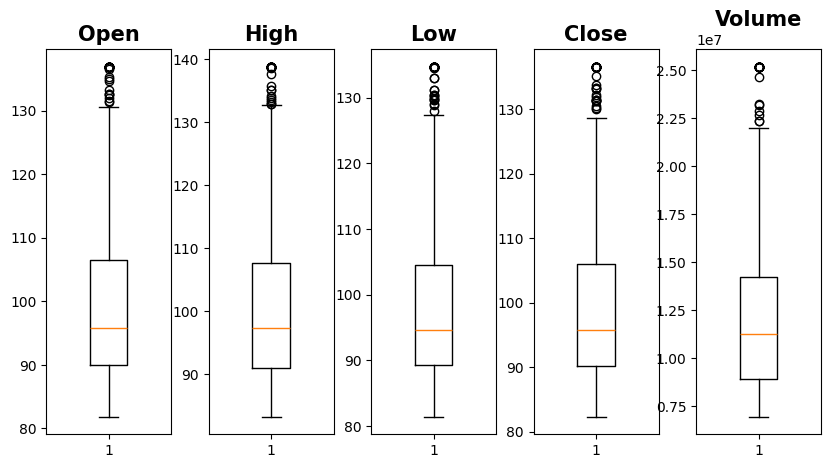

In [123]:
fig, ax = plt.subplots(ncols = 5, figsize = (10, 5))
plt.subplots_adjust(wspace = 0.3)

for i in range(df.shape[1]):
    ax[i].boxplot(df[df.columns[i]], widths = 0.3)
    ax[i].set_title(df.columns[i], fontweight = 'bold').set_fontsize(15)

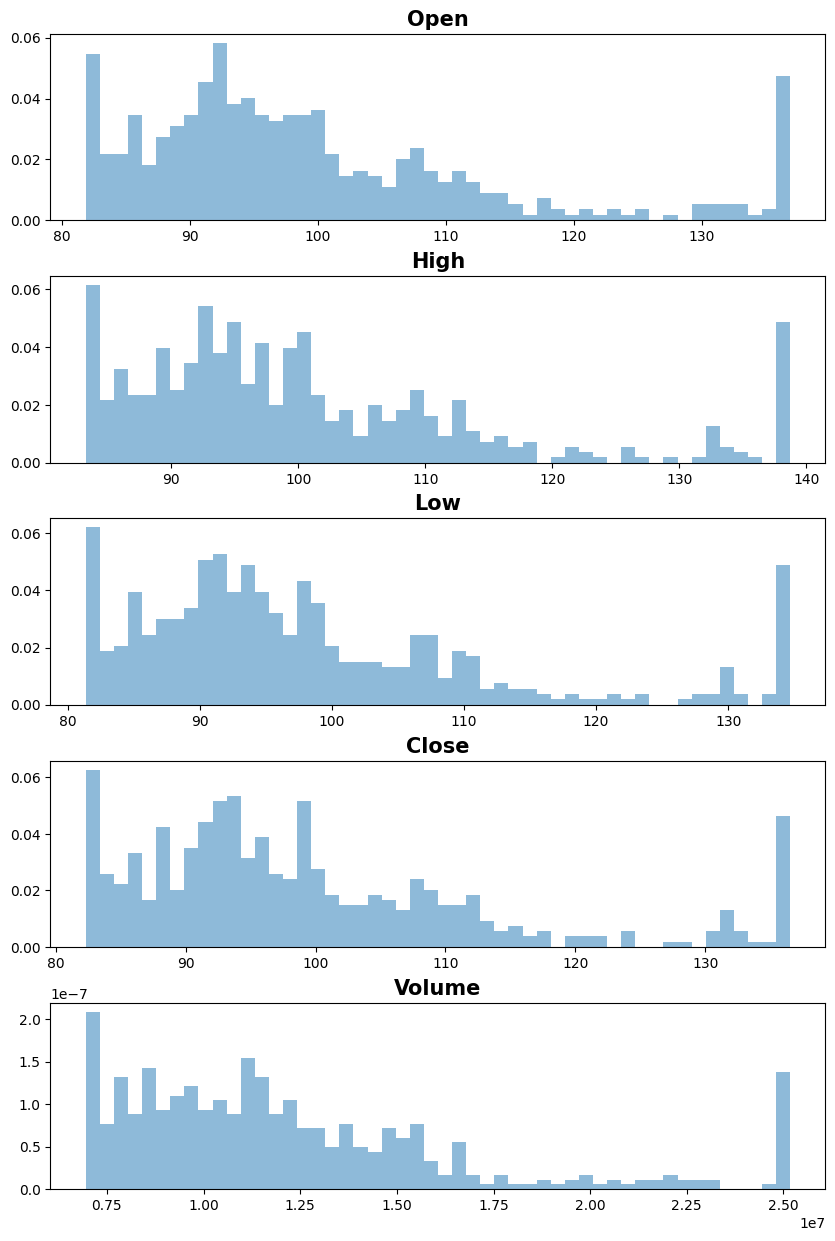

In [124]:
fig, ax = plt.subplots(nrows = 5, figsize = (10, 15))
plt.subplots_adjust(hspace = 0.3)

for i in range(df.shape[1]):
    ax[i].hist(df[df.columns[i]], bins = 50, density = True, alpha = 0.5)
    ax[i].set_title(df.columns[i], fontweight = 'bold').set_fontsize(15)

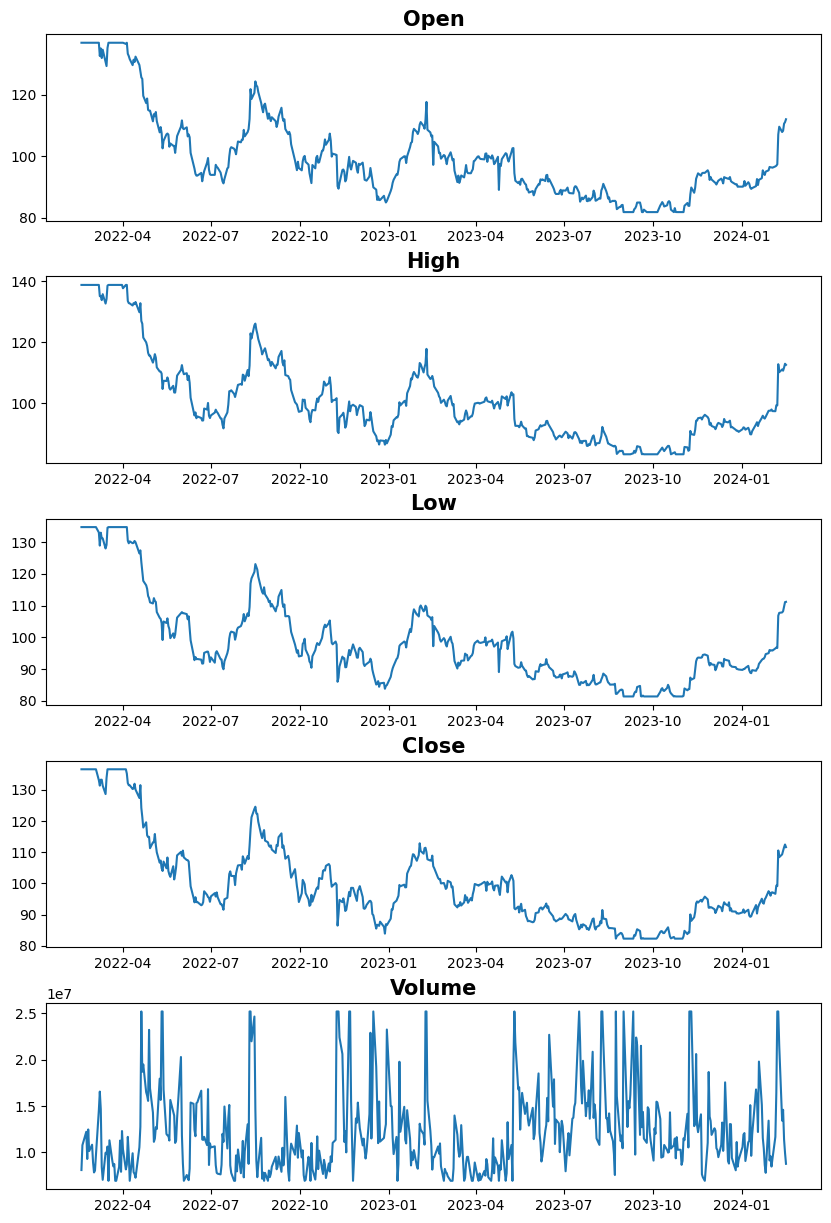

In [125]:
fig, ax = plt.subplots(nrows = 5, figsize = (10, 15))
plt.subplots_adjust(hspace = 0.3)
for i in range(df.shape[1]):
    ax[i].set_title(df.columns[i], fontweight = 'bold').set_fontsize(15)
    ax[i].plot(df[df.columns[i]])

plt.show()

In [126]:
df.to_pickle('fixed_data.pickle')
pd.to_pickle

<function pandas.io.pickle.to_pickle(obj: 'Any', filepath_or_buffer: 'FilePath | WriteBuffer[bytes]', compression: 'CompressionOptions' = 'infer', protocol: 'int' = 5, storage_options: 'StorageOptions | None' = None) -> 'None'>

our solution is not imune to data leakage because we are only reducing the effect that the outliers have and not eliminitating it.

we belive that the data leakage could be better handled if the data was more specific within the days rather than a summary of the day.

through this we can detect in a more specific scale most, if not all, of the outlier purchases that represent data leakage, and acomodate to them, and by doing so reduce the effect of data leakage even more.

but even though this will decrease the effect that data leakage has on the data, it will not be eliminated unless we had the same information that leaked and when it was leaked.

that is because there still is there the possibility of the effects the data leakage to take place in a much smaller scale, and therefor these effects will hide between the actual data and go un-noticed without access to that same information that has leaked.

#### Connceting to WRDS

In [ ]:
# do not run locally!!!!!!

conn = wrds.Connection()

### Get the Data

In [ ]:
# do not run locally!!!!!!

start_date = '2018-01-01'
end_date = '2020-04-01'
symbol = 'ANF' # Abercrombie & Fitch Ticker/Symbol
ANFData = conn.raw_sql(f"""SELECT c.date AS Date,
                                c.permco AS company_code,
                                c.permno AS security_code,
                                i.ticker AS symbol,
                                c.openprc AS Open, 
                                c.askhi AS High,
                                c.bidlo AS Low, 
                                c.prc AS Close, 
                                c.vol AS Volume,
                                c.cfacpr AS splits_adjustment_factor,
                                d.divamt AS Dividend,
                                i.uesindustry AS industry
                            FROM crsp.dsf c JOIN crsp.stksecurityinfohdr i ON c.permno = i.permno
                                LEFT JOIN crsp.dse d ON c.permno = d.permno AND c.date = d.date
                            WHERE c.date >= '{start_date}' AND c.date <= '{end_date}' AND i.ticker = '{symbol}'
                        """, date_cols=['Date'])

In [33]:
ANFData = pd.read_pickle('AberNfitchData.pickle')

### Let's take a first look at our data

In [ ]:
ANFData

,date,company_code,security_code,symbol,open,high,low,close,volume,splits_adjustment_factor,dividend,industry
0,2018-01-02,22200,83976,ANF,17.64,18.300,17.5100,18.20,2275956.0,1.0,NaN,CONDIS
1,2018-01-03,22200,83976,ANF,18.30,18.590,18.1300,18.53,2112677.0,1.0,NaN,CONDIS
2,2018-01-04,22200,83976,ANF,18.41,18.550,17.0400,18.20,3580819.0,1.0,NaN,CONDIS
3,2018-01-05,22200,83976,ANF,18.20,18.540,17.9900,18.28,2288929.0,1.0,NaN,CONDIS
4,2018-01-08,22200,83976,ANF,18.41,18.555,17.9507,18.31,2417879.0,1.0,NaN,CONDIS
...,...,...,...,...,...,...,...,...,...,...,...,...
561,2020-03-26,22200,83976,ANF,9.71,10.620,9.1000,10.00,5052422.0,1.0,NaN,CONDIS
562,2020-03-27,22200,83976,ANF,9.40,10.100,9.0000,9.91,3034780.0,1.0,NaN,CONDIS
563,2020-03-30,22200,83976,ANF,9.80,9.800,9.1400,9.31,1588860.0,1.0,NaN,CONDIS
564,2020-03-31,22200,83976,ANF,9.31,9.585,8.7600,9.09,2346424.0,1.0,NaN,CONDIS


In [ ]:
ANFData[ANFData['dividend'].isna() == 0]

,date,company_code,security_code,symbol,open,high,low,close,volume,splits_adjustment_factor,dividend,industry
45,2018-03-08,22200,83976,ANF,23.72,23.79,22.22,22.35,7520386.0,1.0,0.2,CONDIS
108,2018-06-07,22200,83976,ANF,25.34,25.85,24.50,24.55,3297035.0,1.0,0.2,CONDIS
171,2018-09-06,22200,83976,ANF,22.30,22.52,21.22,21.29,3512426.0,1.0,0.2,CONDIS
234,2018-12-06,22200,83976,ANF,18.79,19.65,18.47,19.32,4326998.0,1.0,0.2,CONDIS
295,2019-03-07,22200,83976,ANF,25.75,26.50,25.34,25.76,6174979.0,1.0,0.2,CONDIS
358,2019-06-06,22200,83976,ANF,16.20,16.28,15.32,15.76,3943243.0,1.0,0.2,CONDIS
421,2019-09-05,22200,83976,ANF,14.75,15.56,14.73,15.42,3930040.0,1.0,0.2,CONDIS
485,2019-12-05,22200,83976,ANF,16.98,17.06,16.61,16.68,1868419.0,1.0,0.2,CONDIS
546,2020-03-05,22200,83976,ANF,13.29,13.30,11.60,11.67,6842556.0,1.0,0.2,CONDIS


### Looks like we have NAs instead of 0's in the dividend column

In [ ]:
ANFData.dividend.fillna(0, inplace = True)

### Calculate the DIR and the CDIR for each day

In [ ]:
ANFData['DIR'] = (1-(ANFData['dividend']/ANFData['close']).abs())

In [ ]:
ANFData.sort_values(by='date', ascending = False, inplace=True)
ANFData['CDIR'] = ANFData['DIR'].cumprod()
ANFData.sort_values(by='date', ascending = True, inplace=True)

In [ ]:
ANFyahoo.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
DIR          float64
CDIR         float64
dtype: object

### We need the Date column as datetime because we order the data chronologicaly

In [ ]:
ANFyahoo['Date'] = ANFyahoo.Date.astype('datetime64[ns]')

In [ ]:
ANFyahoo.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
DIR                 float64
CDIR                float64
dtype: object

In [ ]:
ANFyahoo.sort_values(by='Date', ascending = False, inplace=True)
ANFyahoo['CDIR'] = ANFyahoo['DIR'].cumprod()
ANFyahoo.sort_values(by='Date', ascending = True, inplace=True)

In [ ]:
ANFyahoo['Adjusted Close My Calc'] = (ANFyahoo['Close'] * ANFyahoo['CDIR'])
ANFyahoo['Adjusted Close Gap'] = (ANFyahoo['Adj Close'] - ANFyahoo['Adjusted Close My Calc']).abs()

In [ ]:
ANFyahoo

,Date,Open,High,Low,Close,Adj Close,Volume,DIR,CDIR,Adjusted Close My Calc,Adjusted Close Gap
0,2018-01-02,17.639999,18.299999,17.510000,18.200001,16.532631,2276000,1.0,0.904852,16.468314,0.064317
1,2018-01-03,18.299999,18.590000,18.129999,18.530001,16.832397,2112700,1.0,0.904852,16.766915,0.065482
2,2018-01-04,18.410000,18.549999,17.040001,18.200001,16.532631,3580800,1.0,0.904852,16.468314,0.064317
3,2018-01-05,18.200001,18.540001,17.990000,18.280001,16.605297,2288900,1.0,0.904852,16.540702,0.064595
4,2018-01-08,18.410000,18.559999,17.950001,18.309999,16.632549,2417900,1.0,0.904852,16.567846,0.064703
...,...,...,...,...,...,...,...,...,...,...,...
560,2020-03-25,9.190000,9.690000,8.790000,9.470000,9.470000,3872600,1.0,1.000000,9.470000,0.000000
561,2020-03-26,9.710000,10.620000,9.100000,10.000000,10.000000,5050400,1.0,1.000000,10.000000,0.000000
562,2020-03-27,9.400000,10.100000,9.000000,9.910000,9.910000,3034800,1.0,1.000000,9.910000,0.000000
563,2020-03-30,9.800000,9.800000,9.140000,9.310000,9.310000,1588800,1.0,1.000000,9.310000,0.000000


There is a little gap at the start of the data between our result and the results in yahoo finance that comes from rounding, but it shrinks over time as we get closer to later dates, this happens due to the fact that the first results that comes from yahoo finance are calculated using more data than we use in our calculation, and therefor it is even more correct.

### Now let's calculate at the same way the rest of the adjusted values

In [ ]:
ANFData['Adjusted Open'] = (ANFData['open'] * ANFData['CDIR'])/ANFData['splits_adjustment_factor']
ANFData['Adjusted High'] = (ANFData['high'] * ANFData['CDIR'])/ANFData['splits_adjustment_factor']
ANFData['Adjusted Low'] = (ANFData['low'] * ANFData['CDIR'])/ANFData['splits_adjustment_factor']
ANFData

,date,company_code,security_code,symbol,open,high,low,close,volume,splits_adjustment_factor,dividend,industry,DIR,CDIR,Adjusted Close,Adjusted Open,Adjusted High,Adjusted Low
0,2018-01-02,22200,83976,ANF,17.64,18.300,17.5100,18.20,2275956.0,1.0,0.0,CONDIS,1.0,0.904852,16.468313,15.961596,16.558798,15.843965
1,2018-01-03,22200,83976,ANF,18.30,18.590,18.1300,18.53,2112677.0,1.0,0.0,CONDIS,1.0,0.904852,16.766914,16.558798,16.821206,16.404973
2,2018-01-04,22200,83976,ANF,18.41,18.550,17.0400,18.20,3580819.0,1.0,0.0,CONDIS,1.0,0.904852,16.468313,16.658332,16.785011,15.418684
3,2018-01-05,22200,83976,ANF,18.20,18.540,17.9900,18.28,2288929.0,1.0,0.0,CONDIS,1.0,0.904852,16.540701,16.468313,16.775963,16.278294
4,2018-01-08,22200,83976,ANF,18.41,18.555,17.9507,18.31,2417879.0,1.0,0.0,CONDIS,1.0,0.904852,16.567847,16.658332,16.789536,16.242733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,2020-03-26,22200,83976,ANF,9.71,10.620,9.1000,10.00,5052422.0,1.0,0.0,CONDIS,1.0,1.000000,10.000000,9.710000,10.620000,9.100000
562,2020-03-27,22200,83976,ANF,9.40,10.100,9.0000,9.91,3034780.0,1.0,0.0,CONDIS,1.0,1.000000,9.910000,9.400000,10.100000,9.000000
563,2020-03-30,22200,83976,ANF,9.80,9.800,9.1400,9.31,1588860.0,1.0,0.0,CONDIS,1.0,1.000000,9.310000,9.800000,9.800000,9.140000
564,2020-03-31,22200,83976,ANF,9.31,9.585,8.7600,9.09,2346424.0,1.0,0.0,CONDIS,1.0,1.000000,9.090000,9.310000,9.585000,8.760000
